In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.preprocessing import StandardScaler

import seaborn as sns

In [2]:
def automate_data_processing(df, target_column, missing_value_threshold=0.5):
    threshold = len(df) * missing_value_threshold
    df_cleaned = df.dropna(thresh=threshold, axis=1)
    
    df_cleaned = df_cleaned.dropna(subset=[target_column])
    df_cleaned['main_category'] = df['main_category']
    y = df_cleaned[target_column]
    X = df_cleaned.drop(columns=[target_column])

    df_cleaned = df_cleaned.drop_duplicates()
    
    return df_cleaned, X, y

In [3]:
np.set_printoptions(threshold=np.inf)
df = pd.read_csv('/kaggle/input/projet-dataset/data.csv', sep='\t')
df.head()

/tmp/ipykernel_30/952940062.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/projet-dataset/data.csv', sep='\t')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(320772, 162)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


On voit grâce a df.info() que nous avons **106 données quantitatives** et **56 données catégorielles**

**AFFICHAGE DES PROPORTIONS DE VALEURS MANQUANTES**

In [6]:
df.isna().mean()

code                       0.000072
url                        0.000072
creator                    0.000006
created_t                  0.000009
created_datetime           0.000028
                             ...   
carbon-footprint_100g      0.999165
nutrition-score-fr_100g    0.310382
nutrition-score-uk_100g    0.310382
glycemic-index_100g        1.000000
water-hardness_100g        1.000000
Length: 162, dtype: float64

**Appel de la fonction de préparation des données**

Notre target sera le Nutriscore qui peut facilement être prédit en fonction des qualités nutritives du produit tels que le sucre, le sel, les acides gras saturés, les protéines, etc...

In [7]:
target = 'nutrition_grade_fr'
df_cleaned, X, y = automate_data_processing(df, target)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221210 entries, 1 to 320768
Data columns (total 35 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     221210 non-null  object 
 1   url                                      221210 non-null  object 
 2   creator                                  221210 non-null  object 
 3   created_t                                221210 non-null  object 
 4   created_datetime                         221209 non-null  object 
 5   last_modified_t                          221210 non-null  object 
 6   last_modified_datetime                   221210 non-null  object 
 7   product_name                             218463 non-null  object 
 8   brands                                   216572 non-null  object 
 9   brands_tags                              216571 non-null  object 
 10  countries                            

Il nous reste après le nettoyage des valeurs manquantes **14 données quantitatives** et **21 données catégorielles**. On supprime les features inutiles

In [8]:
df_cleaned = df_cleaned.drop(columns=['code','url','creator','created_t','created_datetime', 'last_modified_t', 'last_modified_datetime','brands','countries','countries_fr','additives_n','ingredients_from_palm_oil_n', 'states_tags', 'states_fr', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'])

On vérifie les dimensions de notre ensemble

In [9]:
df_cleaned.shape

(221210, 19)

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221210 entries, 1 to 320768
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   product_name                             218463 non-null  object 
 1   brands_tags                              216571 non-null  object 
 2   countries_tags                           221153 non-null  object 
 3   ingredients_text                         196179 non-null  object 
 4   serving_size                             174302 non-null  object 
 5   additives                                196158 non-null  object 
 6   ingredients_that_may_be_from_palm_oil_n  196179 non-null  float64
 7   nutrition_grade_fr                       221210 non-null  object 
 8   states                                   221210 non-null  object 
 9   energy_100g                              221019 non-null  float64
 10  fat_100g                             

In [11]:
df_cleaned[target].isna().mean()

0.0

On vérifie qu'il n'y a pas de doublons

In [12]:
df_cleaned = df_cleaned.drop_duplicates()

In [13]:
features = df_cleaned.columns
#['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']
X = df_cleaned[features]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219087 entries, 1 to 320768
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   product_name                             216357 non-null  object 
 1   brands_tags                              214468 non-null  object 
 2   countries_tags                           219030 non-null  object 
 3   ingredients_text                         194091 non-null  object 
 4   serving_size                             172253 non-null  object 
 5   additives                                194070 non-null  object 
 6   ingredients_that_may_be_from_palm_oil_n  194091 non-null  float64
 7   nutrition_grade_fr                       219087 non-null  object 
 8   states                                   219087 non-null  object 
 9   energy_100g                              218896 non-null  float64
 10  fat_100g                             

**Premier Nettoyage**

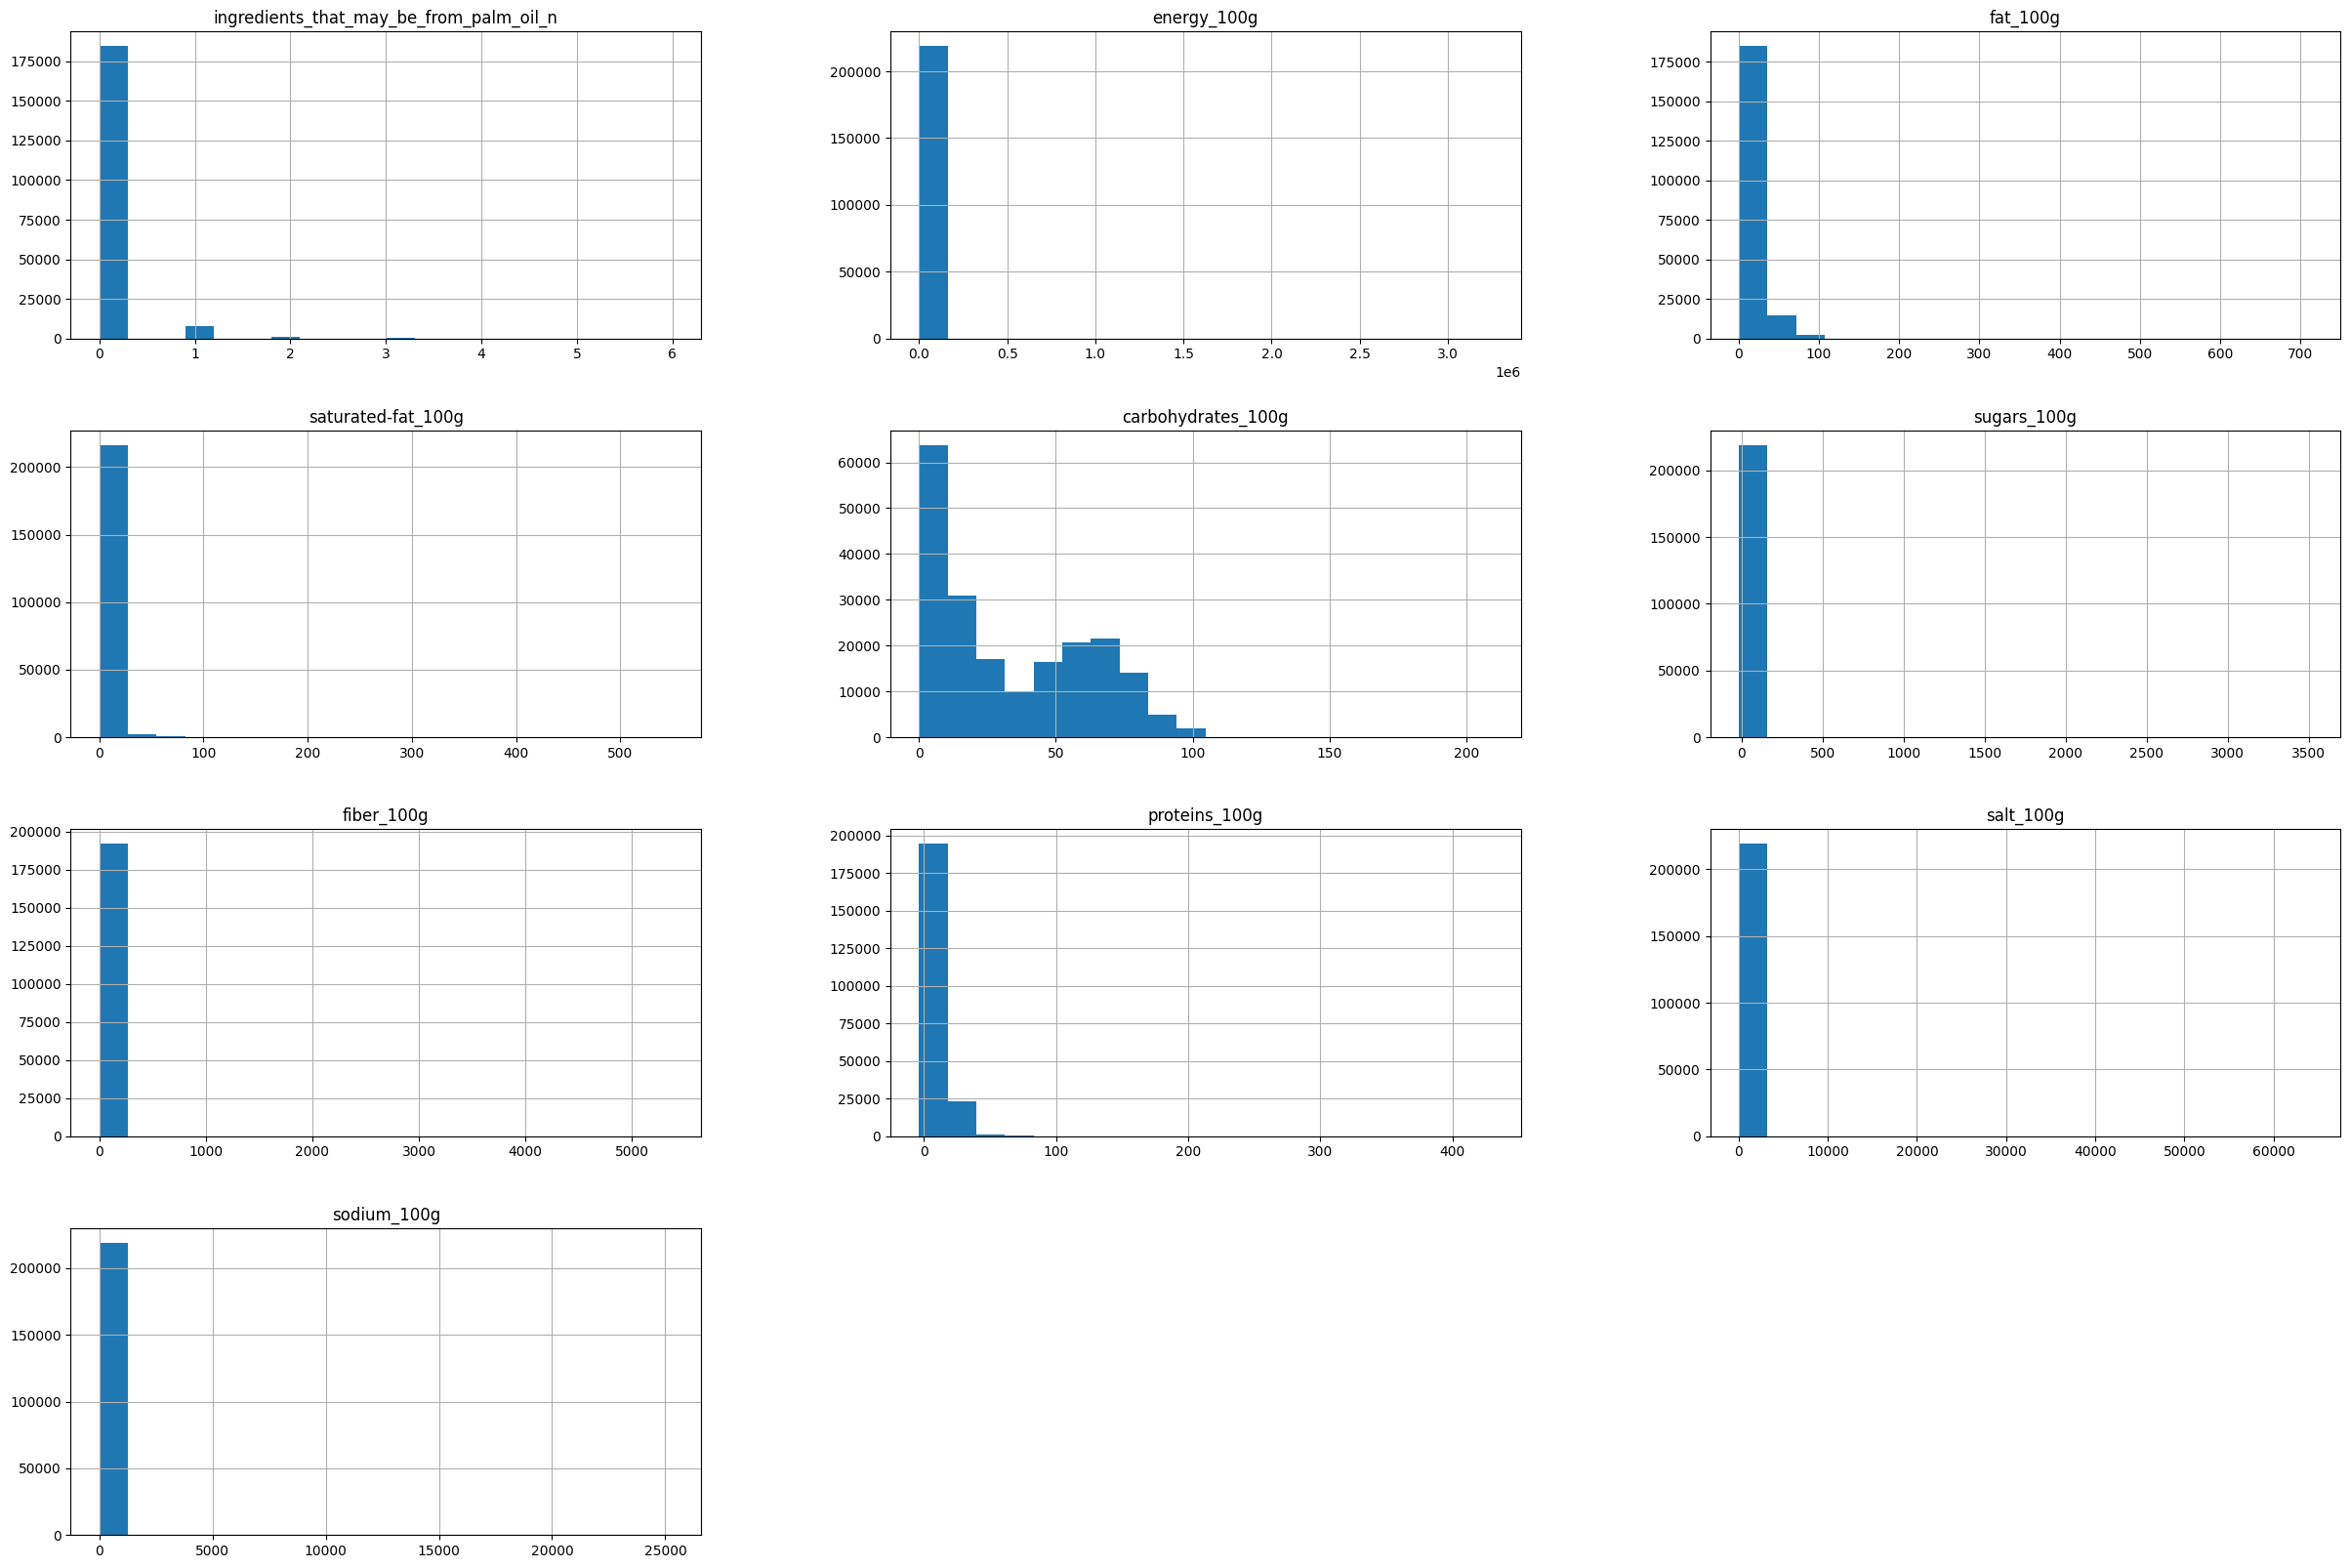

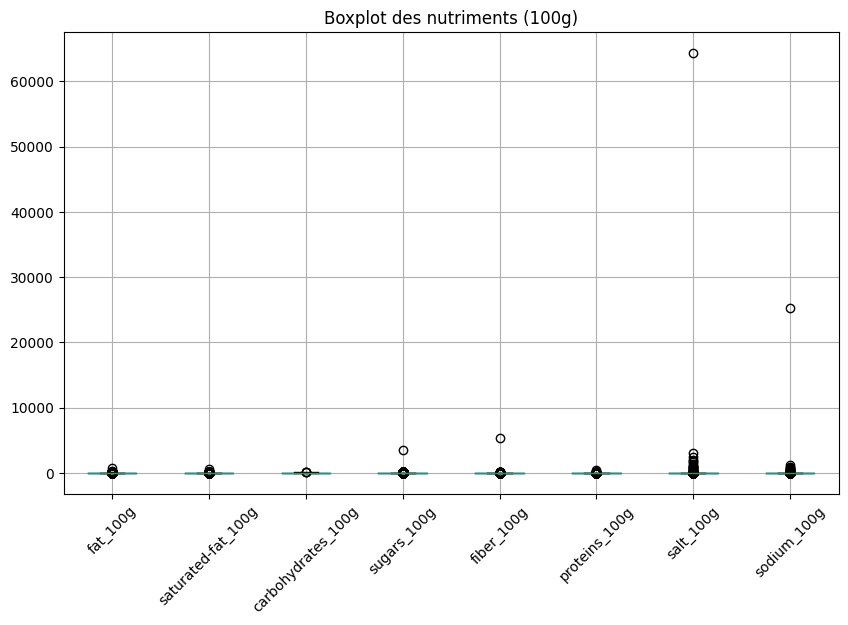

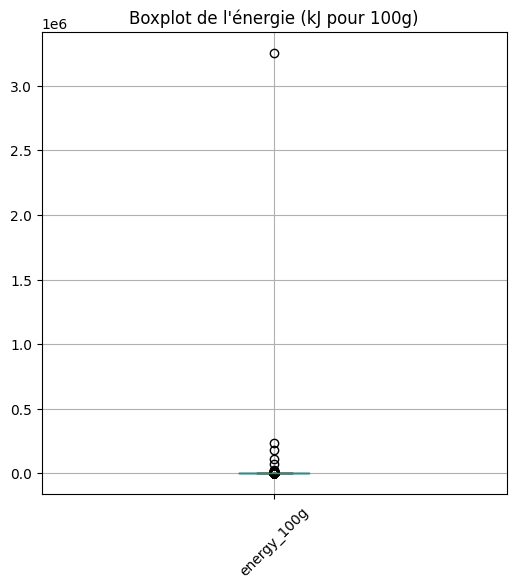

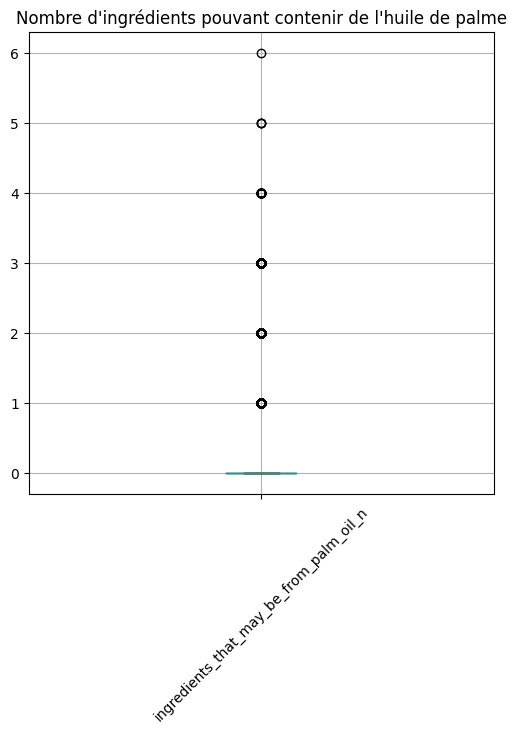

In [14]:
X.hist(bins=20, figsize=(30, 20))
plt.show()

nutriment_features = [col for col in X.columns if col.endswith('_100g') and col != 'energy_100g']

plt.figure(figsize=(10, 6))
X[nutriment_features].boxplot() 
plt.title("Boxplot des nutriments (100g)")
plt.xticks(rotation=45)
plt.show()

# Figure pour l'énergie
plt.figure(figsize=(6, 6))
X[['energy_100g']].boxplot()
plt.title("Boxplot de l'énergie (kJ pour 100g)")
plt.xticks(rotation=45)
plt.show()

# Figure pour l'énergie
plt.figure(figsize=(6, 6))
X[['ingredients_that_may_be_from_palm_oil_n']].boxplot()
plt.title("Nombre d'ingrédients pouvant contenir de l'huile de palme")
plt.xticks(rotation=45)
plt.show()

On supprime dans un premier temps les lignes ayant des valeurs aberrerantes d'un pdv métier

In [15]:
keywords = [
    'france', 'guadeloupe', 'martinique', 'guyane', 'reunion', 'mayotte', 
    'saint-pierre-et-miquelon', 'saint-barthélemy', 'saint-martin',
    'polynésie française', 'nouvelle-calédonie', 'wallis-et-futuna', 'french-guiana'
]

X = X[X['countries_tags'].str.contains('|'.join(keywords), case=False, na=False)]

X.head()

,product_name,brands_tags,countries_tags,ingredients_text,serving_size,additives,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,main_category
106,Lion Peanut x2,sunridge,"en:france,en:united-states","Milk chocolate coating (evaporated cane juice,...",40 g (0.25 cup),[ milk-chocolate-coating -> en:milk-chocolate...,0.0,e,"en:to-be-completed, en:nutrition-facts-complet...",1883.0,20.0,12.5,70.0,57.5,2.5,2.5,0.09652,0.038000,NaN
190,Mini Confettis,alice-delice,en:france,NaN,NaN,NaN,NaN,d,"en:to-be-completed, en:nutrition-facts-complet...",1753.0,NaN,0.8,NaN,87.7,0.9,0.6,0.01000,0.003937,NaN
191,Praliné Amande Et Noisette,alice-delice,en:france,NaN,NaN,NaN,NaN,d,"en:to-be-completed, en:nutrition-facts-complet...",2406.0,NaN,2.9,NaN,50.3,3.9,9.5,0.00300,0.001181,NaN
226,"Pepsi, Nouveau goût !",pepsi,en:france,"Eau gazéifiée, sucre, colorant caramel E150d, ...",150ml,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,0.0,e,"en:to-be-checked, en:complete, en:nutrition-fa...",177.0,0.0,0.0,10.4,10.4,0.0,0.0,0.02540,0.010000,en:sodas
234,Tarte Poireaux Et Lardons,bo-frost,en:france,NaN,NaN,NaN,NaN,d,"en:to-be-completed, en:nutrition-facts-complet...",1079.0,NaN,11.0,NaN,1.0,1.4,7.5,0.80000,0.314961,NaN


In [16]:
X.shape

(61415, 19)

In [17]:
def clean_outliers(df):
    # Obtenir toutes les colonnes se terminant par '_100g'
    cols_100g = [col for col in df.columns if col.endswith('_100g')]
    
    # Transformer les valeurs négatives en valeurs absolues
    df[cols_100g] = df[cols_100g].applymap(lambda x: abs(x) if pd.notnull(x) else x)

    # Limiter les valeurs maximales
    # Pour 'energy_100g', les valeurs > 5000 deviennent NaN
    if 'energy_100g' in df.columns:
        df['energy_100g'] = df['energy_100g'].apply(lambda x: x if x <= 5000 else float('NaN'))
    
    # Pour les autres colonnes "_100g" (sauf 'energy_100g'), les valeurs > 100 deviennent NaN
    for col in cols_100g:
        if col != 'energy_100g':
            df[col] = df[col].apply(lambda x: x if x <= 100 else float('NaN'))

    return df


X = clean_outliers(X)

/tmp/ipykernel_30/2533899906.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols_100g] = df[cols_100g].applymap(lambda x: abs(x) if pd.notnull(x) else x)


main_category
en:cakes            12
en:sugary-snacks    11
en:breakfasts        4
en:sandwiches        1
en:breads            1
en:pastries          1
Name: count, dtype: int64


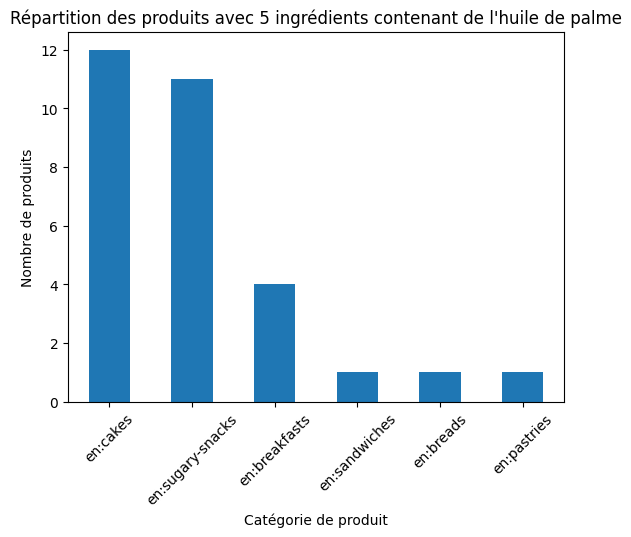

In [19]:
import matplotlib.pyplot as plt
# Filtrer les produits ayant 5 ingrédients contenant de l'huile de palme
palm_oil_5_ingredients = X[X['ingredients_that_may_be_from_palm_oil_n'] >= 4]

# Afficher les catégories de ces produits
print(palm_oil_5_ingredients['main_category'].value_counts())
# Graphique de la répartition des catégories
palm_oil_5_ingredients['main_category'].value_counts().plot(kind='bar')
plt.xlabel("Catégorie de produit")
plt.ylabel("Nombre de produits")
plt.xticks(rotation=45)
plt.title("Répartition des produits avec 5 ingrédients contenant de l'huile de palme")
plt.show()

main_category
en:vegetable-oils       149
en:olive-oils            64
en:virgin-olive-oils     15
en:animal-fats            7
en:vegetable-fats         3
en:jams                   2
en:canned-sardines        2
en:dried-fruits           1
fr:lardons                1
en:pickles                1
en:sugary-snacks          1
en:nuts                   1
en:salted-spreads         1
en:pastas                 1
en:candies                1
en:fats                   1
en:biscuits               1
en:condiments             1
en:cheeses                1
en:butters                1
Name: count, dtype: int64


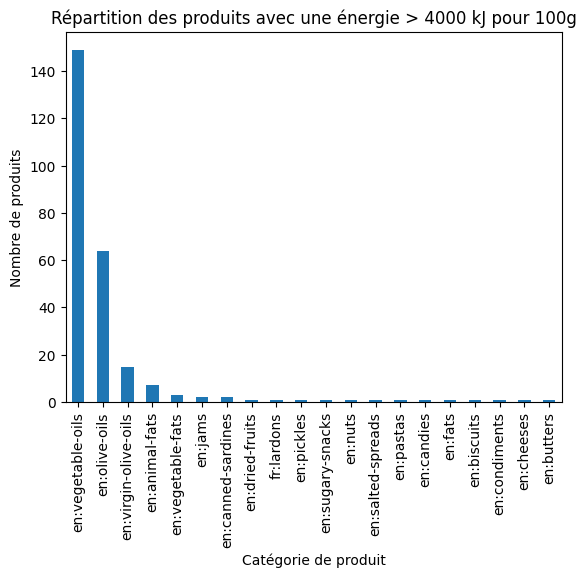

In [20]:
# Définir un seuil énergétique
energy_threshold = 3500

# Filtrer les produits avec une énergie supérieure au seuil
high_energy_products = X[X['energy_100g'] > energy_threshold]

# Afficher les catégories de ces produits
print(high_energy_products['main_category'].value_counts())

# Graphique de la répartition des catégories pour les produits à haute énergie
high_energy_products['main_category'].value_counts().plot(kind='bar')
plt.xlabel("Catégorie de produit")
plt.ylabel("Nombre de produits")
plt.title("Répartition des produits avec une énergie > 4000 kJ pour 100g")
plt.show()

In [21]:
def clean_nutrient_outliers(df):
    # Définir les seuils pour chaque nutriment
    nutrient_thresholds = {
        'fat_100g': 100,
        'saturated-fat_100g': 80,
        'carbohydrates_100g': 100,
        'sugars_100g': 100,
        'fiber_100g': 30,
        'proteins_100g': 90,
        'salt_100g': 10,
        'sodium_100g': 4
    }

    # Appliquer les seuils pour chaque nutriment
    for nutrient, threshold in nutrient_thresholds.items():
        if nutrient in df.columns:
            df[nutrient] = df[nutrient].apply(lambda x: x if x <= threshold else float('NaN'))

    return df

# Nettoyer les valeurs aberrantes dans le DataFrame
X = clean_nutrient_outliers(X)

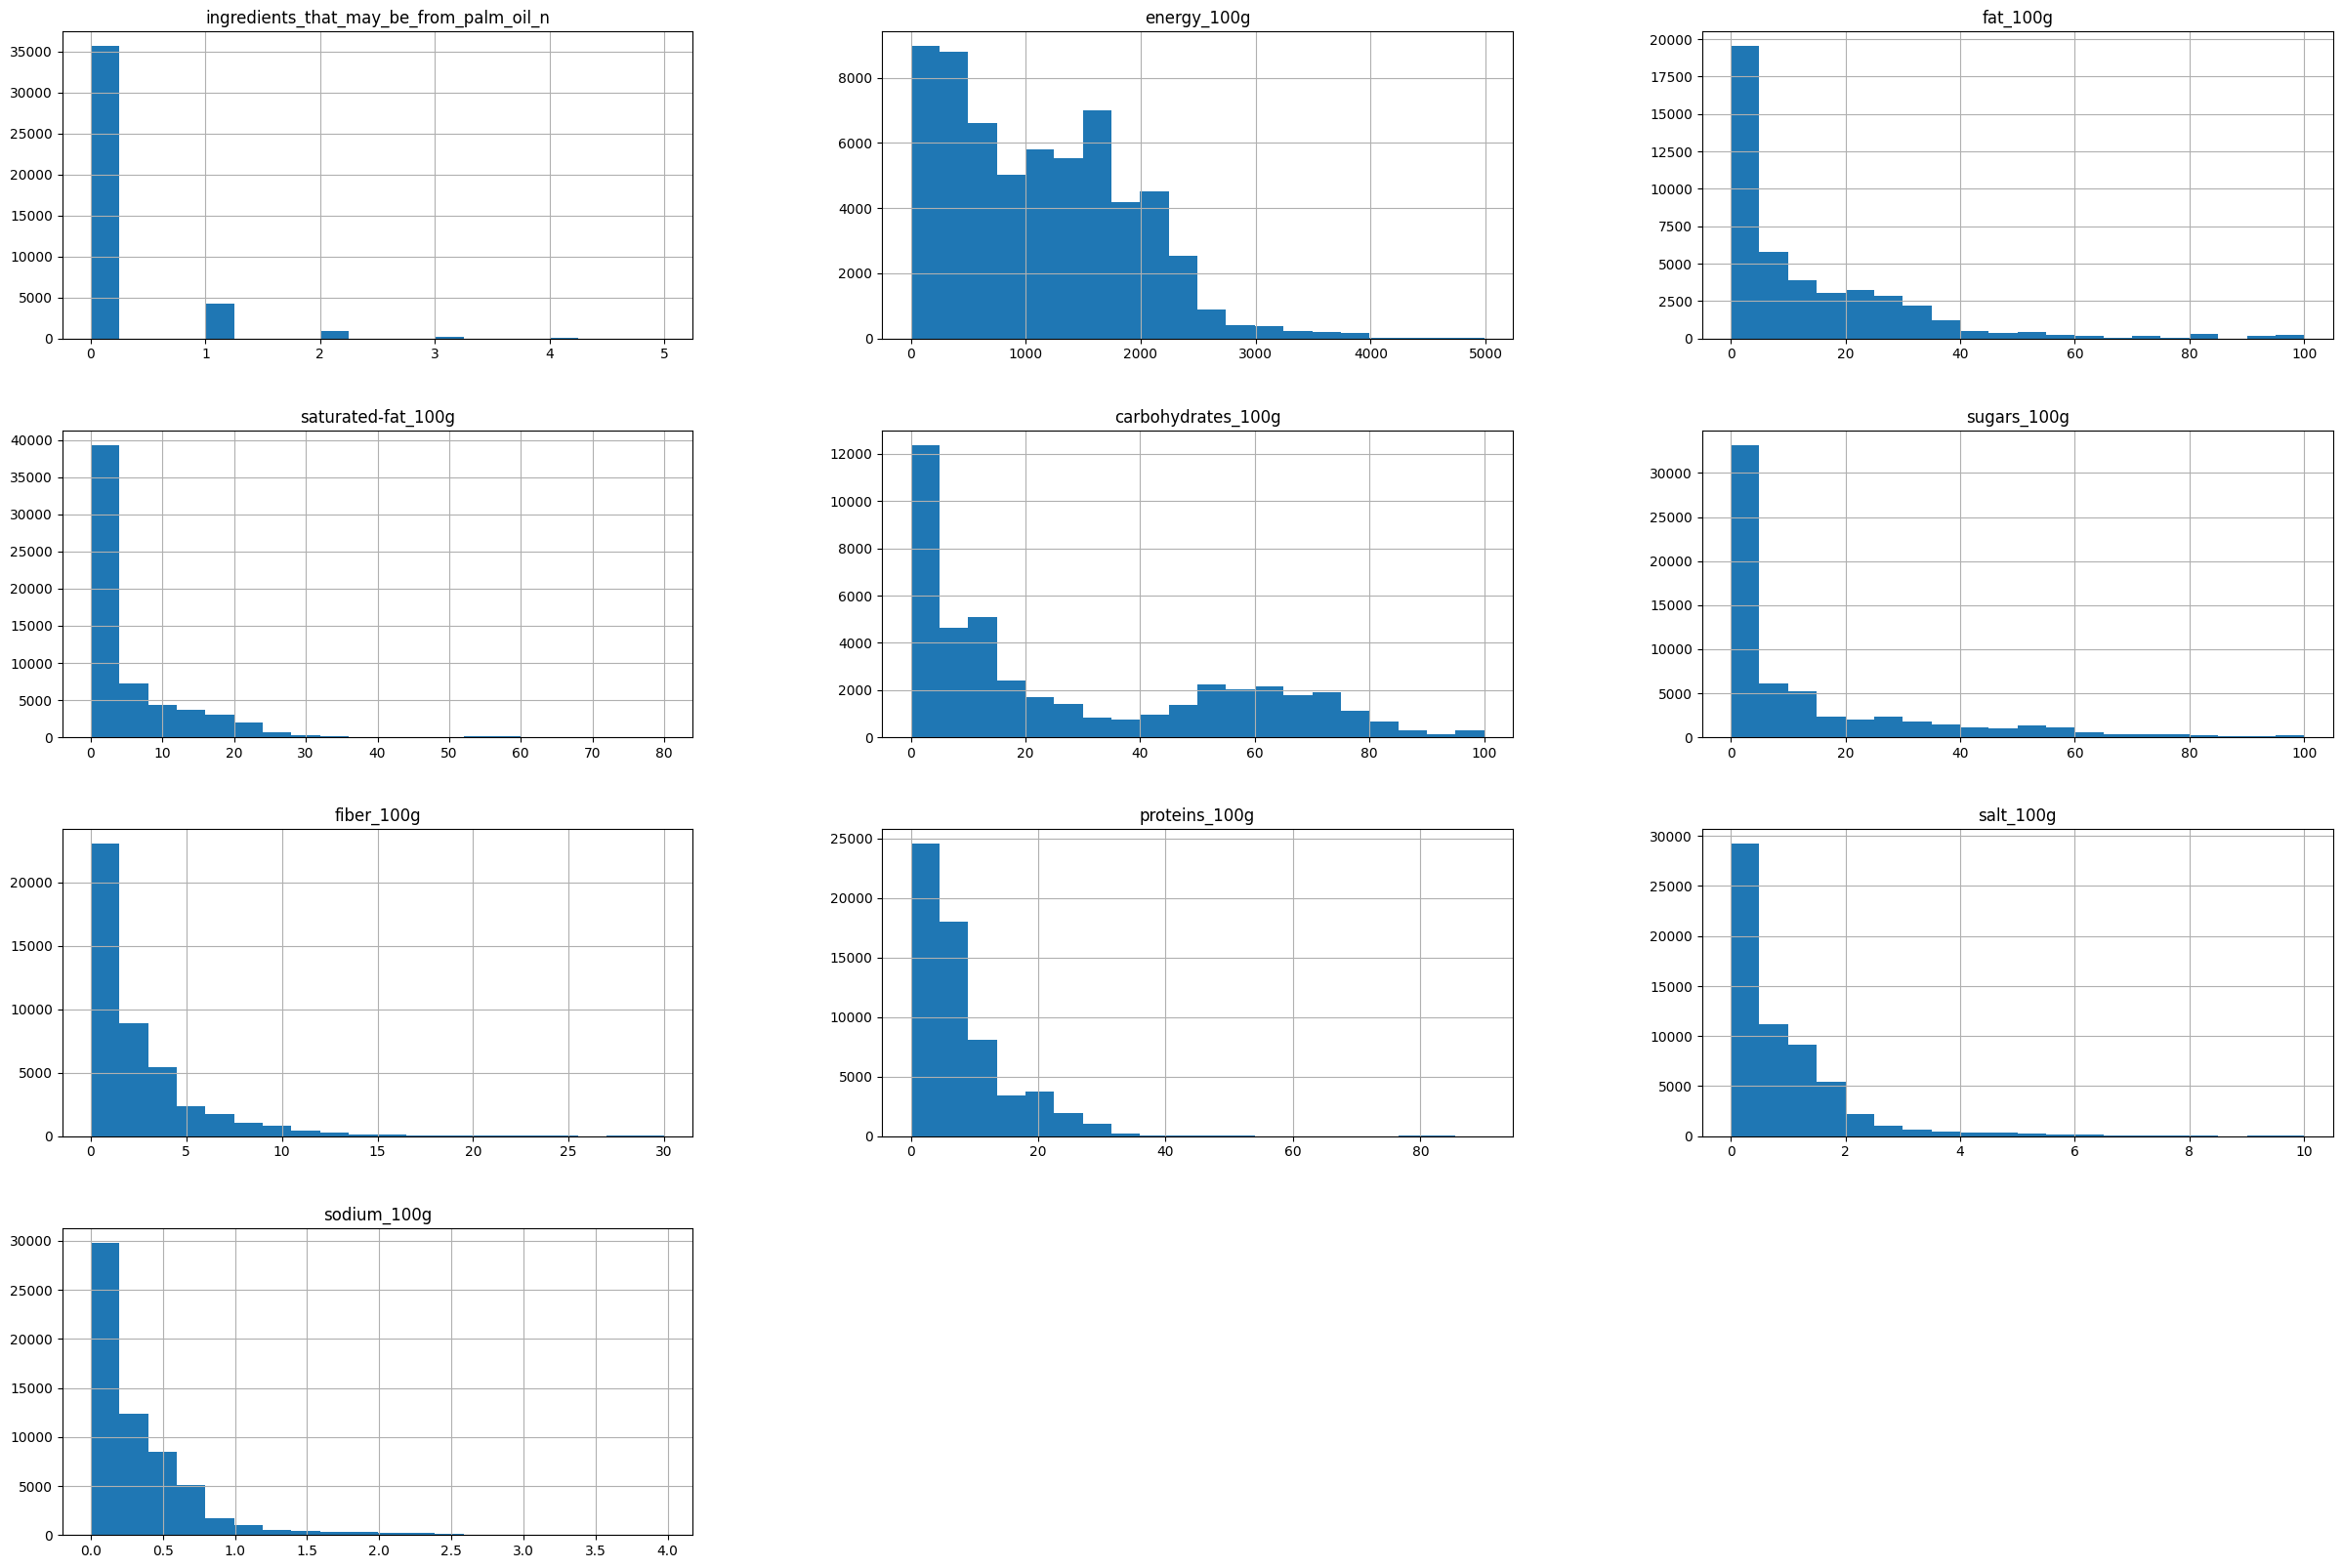

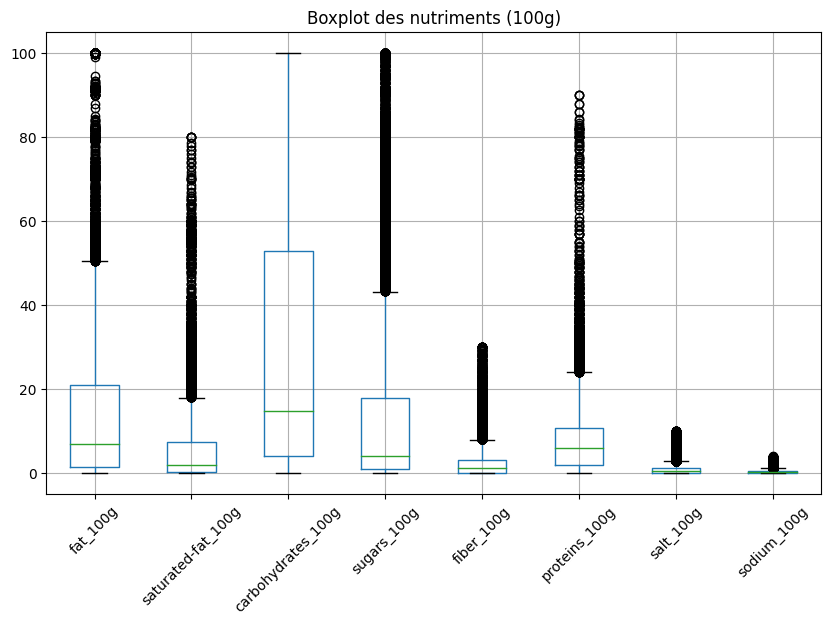

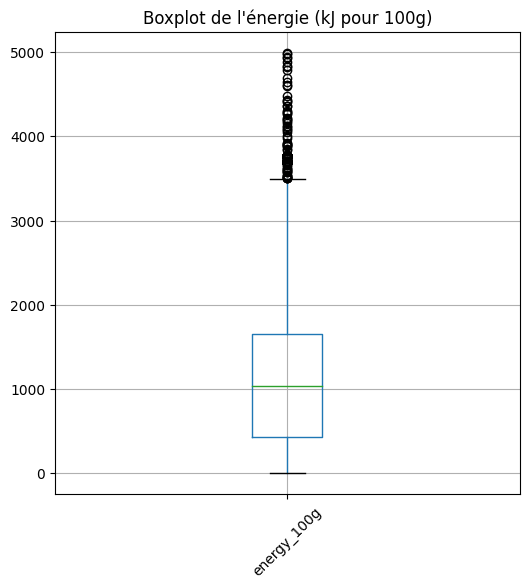

In [22]:
X.hist(bins=20, figsize=(30, 20))
plt.show()

plt.figure(figsize=(10, 6))
X[nutriment_features].boxplot() 
plt.title("Boxplot des nutriments (100g)")
plt.xticks(rotation=45)
plt.show()

# Figure pour l'énergie
plt.figure(figsize=(6, 6))
X[['energy_100g']].boxplot()
plt.title("Boxplot de l'énergie (kJ pour 100g)")
plt.xticks(rotation=45)
plt.show()

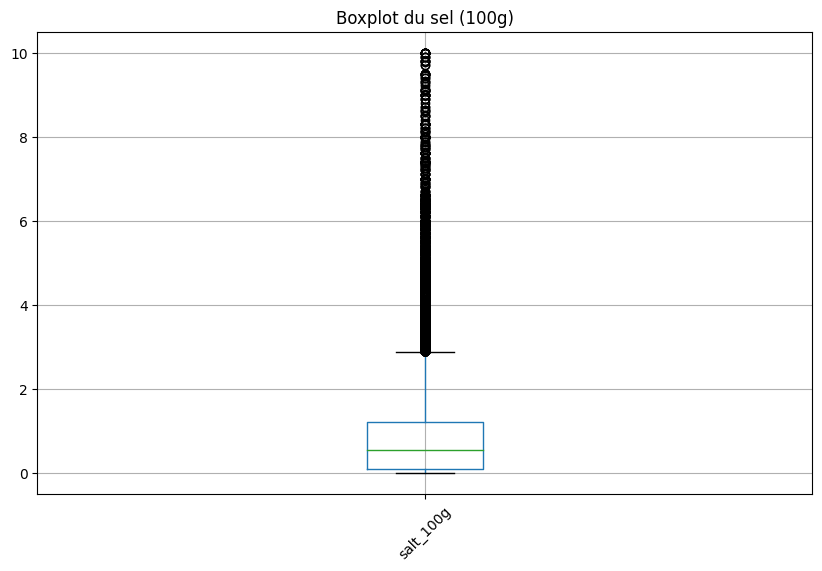

(array([1]), [Text(1, 0, 'sodium_100g')])

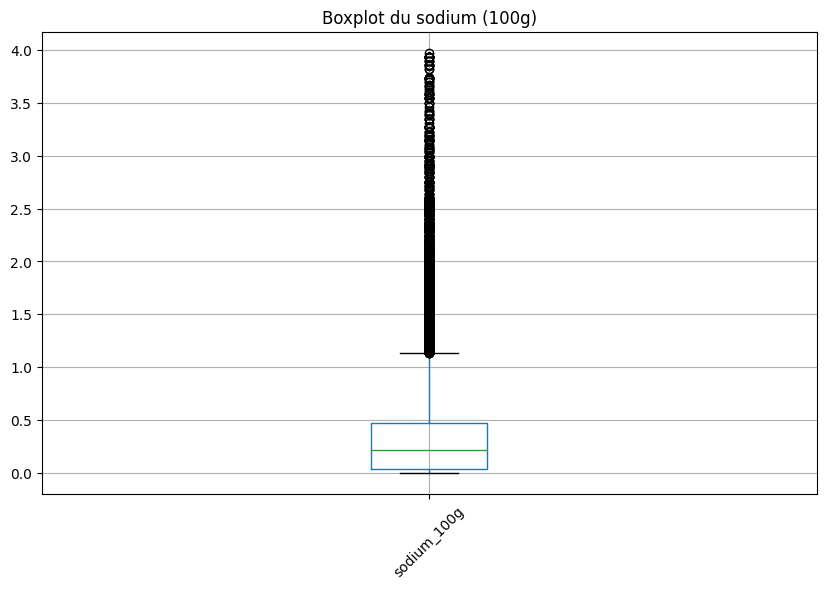

In [28]:
plt.figure(figsize=(10, 6))
X[['salt_100g']].boxplot() 
plt.title("Boxplot du sel (100g)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
X[['sodium_100g']].boxplot() 
plt.title("Boxplot du sodium (100g)")
plt.xticks(rotation=45)

In [30]:
X.isna().mean() * 100

product_name                                0.555239
brands_tags                                 0.566637
countries_tags                              0.000000
ingredients_text                           33.285028
serving_size                               60.372873
additives                                  33.299682
ingredients_that_may_be_from_palm_oil_n    33.285028
nutrition_grade_fr                          0.000000
states                                      0.000000
energy_100g                                 0.210046
fat_100g                                   27.999674
saturated-fat_100g                          0.240983
carbohydrates_100g                         28.092486
sugars_100g                                 0.136774
fiber_100g                                 27.364650
proteins_100g                               0.148172
salt_100g                                   0.937882
sodium_100g                                 0.936253
main_category                              27.